
**Name**: Loten Noy, Gil-ad Katz

**Student ID**: 201466349, 313591851

**Date**: 06.04.2023

<hr>

##### Advanced Statistics for Data Science (Spring 2023)
# Home Assignment 1
#### Topics:
- The Linear Model
- Linear Least Squares
- Exploratory data analysis
- Normal, chisquared, t, and F distributions

#### Due: 04/23/2022 by 18:30

$\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}$

#### Instructions:
- Write your names, Student IDs, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>

<hr>
<hr>

## Problem 1 (Making a Model)
A data analysis team of a large clothing stores chain wants to model the effect of a new advertising campaign involving road signs on sales revenue. The model they want to use has the weekly number of product sold growing linearly over time, for week $t=0,1,\ldots$. At time $t=100$, they launch the campaign but only in Herzliya. They think this could change the slope at time $t=100$ but only for stores in Herzliya (it changes the *slope*, hence would not put a jump discontinuity into the expected sales revenue).

1. Write a linear model that the team can use. Be sure to say what features $\{Z_{ij}\}$ go into the model.
2. Maybe the intervention did not do anything. Which parameter in your model would then be zero? (make sure you have such a parameter in your model). 

*The point*: as data scientistis/statistician, you have to turn the domain person's intuition into a model. They may not come to you talking about $x$s and $y$s and $\beta$ and $\epsilon$. Also, the model might be something they want to disprove. 

<hr> 
<hr>

## Problem 2 (Linerization trick in Sinusiodal Regression)
1. Consider the model:
$$
\mathbb E[Y|X=x] = \beta_0 + \beta_1 \cos\left(2\pi  (x - \beta_2) \right)
$$
with predictor $x$, response varaible $y$, and parameters $\beta_0$, $\beta_1$, and $\beta_2$. Is this model linear?
2. Consider instead the model:
$$
\mathbb E[Y|X=x] = \beta_0' + \beta_1' \sin\left(2\pi \cdot x\right) + \beta_2' \cos(2 \pi \cdot x),
$$
with predictor $x$, response varaible $y$, and parameters $\beta_0'$, $\beta_1'$, and $\beta_2'$. Is this model linear?
3. Show that the model from 1 can be written as the model in 2 in the sense that $(\beta_0', \beta_1', \beta_2')$ are functions of $(\beta_0, \beta_1, \beta_2)$. Find these functions.

<hr> 
<hr>

## Problem 3 (EDA)
For this problem, you will need to go through the exploratory data analysis (EDA) notebook in the course page

1. Download the Red Wine Quality Dataset from UCI repository (the file winequality-red.csv at https://archive.ics.uci.edu/ml/datasets/Wine+Quality). 
2. Filter columns to cosnider only the five variables: $\texttt{density}$, $\texttt{alcohol}$, $\texttt{pH}$, $\texttt{volatile}$, $\texttt{acidity}$, and the target variable $\texttt{quality}$.
3. Evaluate mean, varaince, median, q1, q3, IQR, and absolute range of each variable.
4. Indicate whether there are outliers, namely data points exceeding 1.5 the IQR (above or below). Mark and remove those.  
5. Illustrate the covaraince matrix of all variable. Indicate variables most correlated with the target variable. 
6. Illustrate a "pairs plot", i.e. a matrix of scatterplots in which each cell involves two variables except the diagonal.

<hr>
<hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

**2. Generate and filter dataframe**

In [2]:
# Your code here
wine_df = pd.read_csv('data/winequality-red.csv', sep=';')
wine_df = wine_df[['density', 'alcohol', 'pH', 'volatile acidity', 'fixed acidity', 'quality']]
target = wine_df.pop('quality')

**3. General Stats**

In [3]:
wine_df.describe()

,density,alcohol,pH,volatile acidity,fixed acidity
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.996747,10.422983,3.311113,0.527821,8.319637
std,0.001887,1.065668,0.154386,0.179060,1.741096
min,0.990070,8.400000,2.740000,0.120000,4.600000
25%,0.995600,9.500000,3.210000,0.390000,7.100000
50%,0.996750,10.200000,3.310000,0.520000,7.900000
75%,0.997835,11.100000,3.400000,0.640000,9.200000
max,1.003690,14.900000,4.010000,1.580000,15.900000


IQR

In [10]:
iqr = wine_df.quantile(0.75) - wine_df.quantile(0.25)
iqr

density             0.002235
alcohol             1.600000
pH                  0.190000
volatile acidity    0.250000
fixed acidity       2.100000
dtype: float64

**4. Remove Outliers**

In [5]:
thr = iqr * 1.5
outliers = ((wine_df > wine_df.quantile(0.75) + thr) | (wine_df < wine_df.quantile(0.25) - thr)).any(axis=1)
no_outliers = wine_df[~outliers]
no_outliers.head(5)

,density,alcohol,pH,volatile acidity,fixed acidity
0,0.9978,9.4,3.51,0.70,7.4
1,0.9968,9.8,3.20,0.88,7.8
2,0.9970,9.8,3.26,0.76,7.8
3,0.9980,9.8,3.16,0.28,11.2
4,0.9978,9.4,3.51,0.70,7.4


**5. Covariance and Label correlations**

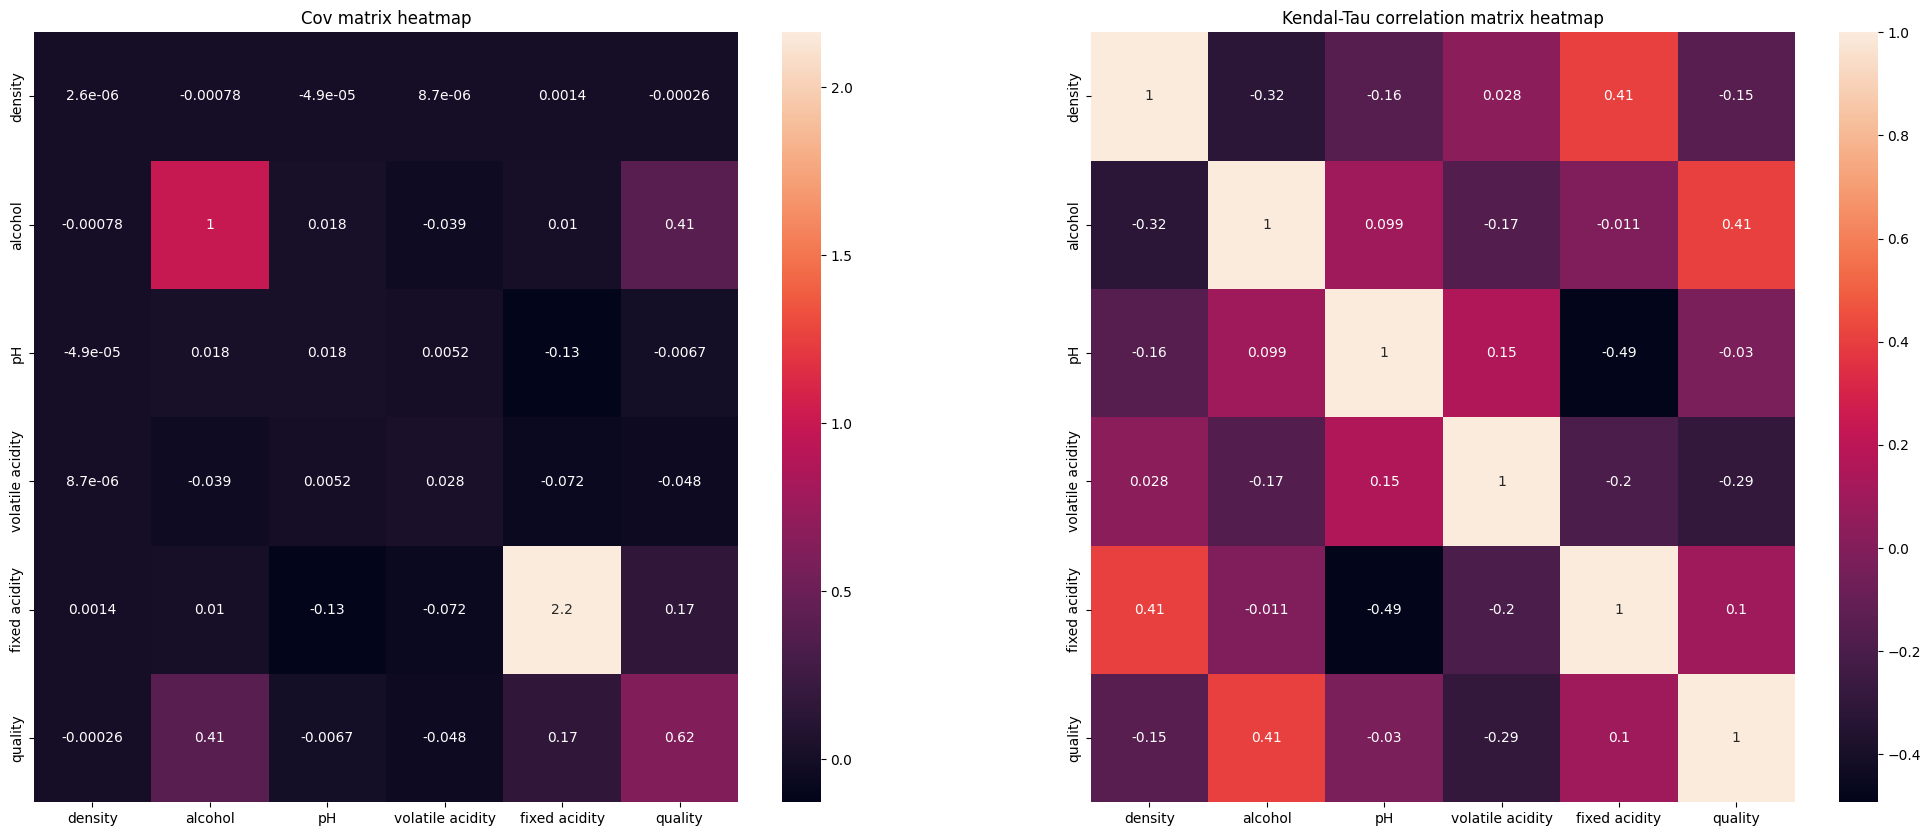

In [6]:
_, ax = plt.subplots(1, 2, figsize=(25,10))
sns.heatmap(pd.concat([no_outliers, target[~outliers]], axis=1).cov(), ax=ax[0], annot=True)
sns.heatmap(pd.concat([no_outliers, target[~outliers]], axis=1).corr(method='kendall'), ax=ax[1], annot=True)
ax[0].set(title='Cov matrix heatmap')
ax[1].set(title='Kendal-Tau correlation matrix heatmap');

**6. Pairplots**

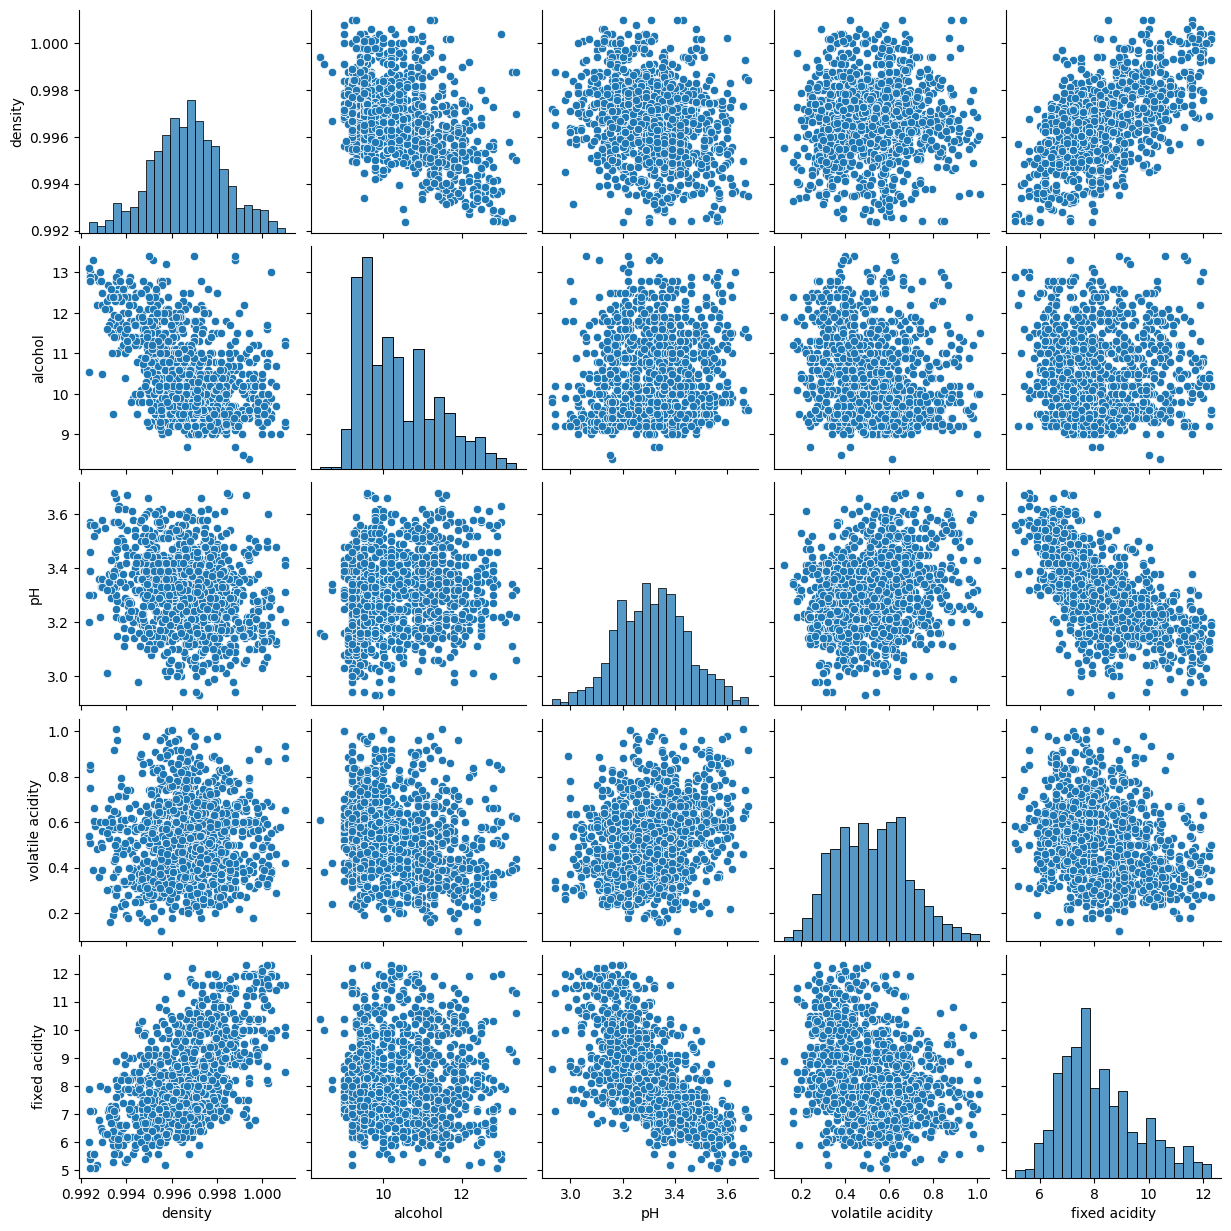

In [7]:
sns.pairplot(no_outliers);

## Problem 4 (Least squares)

1. Consider the Red Wine Quality Dataset of the previous question. Fit a least squares model to ``quality`` based on the other variables and a constant term. Report on the vector of regression coefficients $\hat{\beta}$. Make sure to indicate which entry is associated with each predictor. 
3. Plot the response values $y$ and the fitted response $\hat{y} = Z \hat{\beta}$
4. Illustrate the histogram of the residual vector $\hat{\epsilon}$; what is the average of this vector?
5. Write a code that verifies  (using e.g. ``numpy.isclose``):
 - $H = H^\top$ 
 - $H^2 = H$
 - $\hat{\epsilon}^\top \hat{y} = 0$ 
 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 - $SS_{Tot} = SS_{Fit} + SS_{Res}$, for the sum of squares decomposition 

<hr>
<hr>

**1. LS Fit**

In [8]:
# Your code here
X = no_outliers.copy()
y = target[~outliers]

scaler = StandardScaler()
Z = scaler.fit_transform(X)

Z.shape

(1476, 5)

In [291]:
reg = linear_model.LinearRegression().fit(Z, y)

In [292]:
beta = [reg.intercept_] + list(reg.coef_)
pd.DataFrame(beta, columns=['𝛽'], index=[f'z{i}' for i in range(6)])

,𝛽
z0,5.629404
z1,-0.007753
z2,0.362678
z3,-0.029389
z4,-0.184783
z5,0.042707


**2. Evaluation Plot**

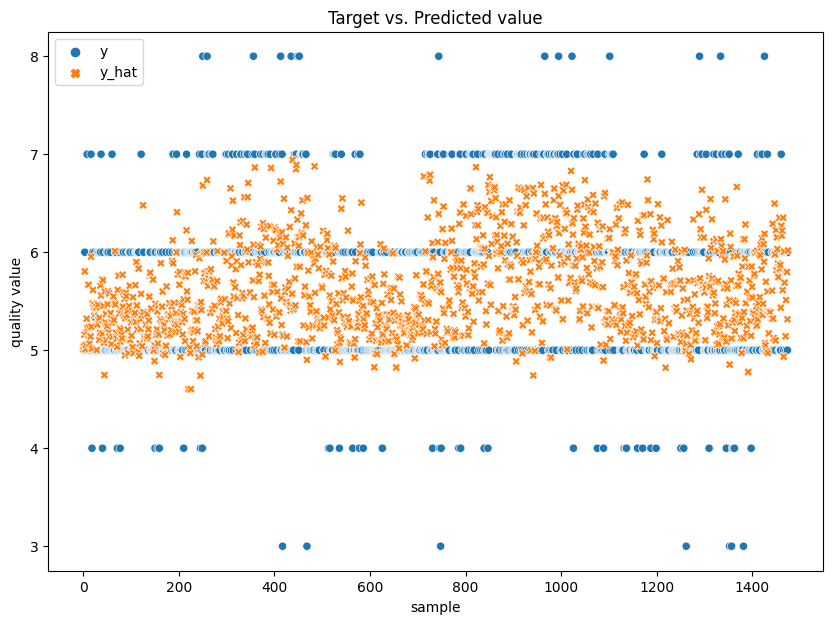

In [293]:
_, ax = plt.subplots(1, figsize=(10, 7))
y_hat = reg.predict(Z)
sns.scatterplot(pd.DataFrame(np.column_stack([y, y_hat]), columns=['y', 'y_hat']), ax=ax)
ax.set(xlabel='sample', ylabel='quality value', title='Target vs. Predicted value');

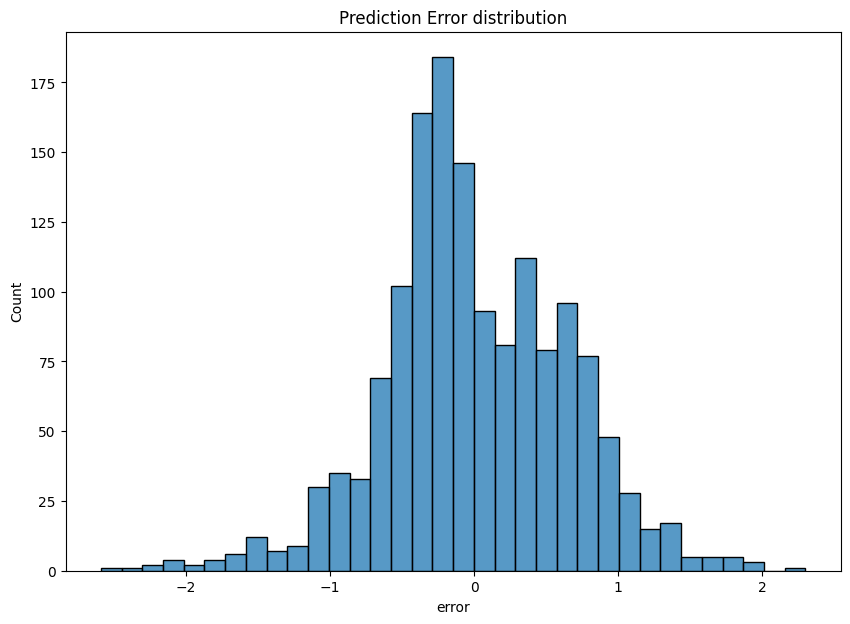

In [310]:
_, ax = plt.subplots(1, figsize=(10, 7))
error = y - y_hat
sns.histplot(error, ax=ax)
ax.set(title='Prediction Error distribution', xlabel='error');

In [312]:
print('error mean =', error.mean())

error mean = 1.19145885569529e-16


**5. Proves**
 - $H = H^\top$ 
 - $H^2 = H$
 - $\hat{\epsilon}^\top \hat{y} = 0$ 
 - $\lambda_i(H) \in \{0,1\}$, where $\lambda_i$ is the $i$-th eigenvalue of $H$
 - $\|y\|^2 = \|\hat{\epsilon}\|^2 + \|\hat{y}\|^2$
 - $SS_{Tot} = SS_{Fit} + SS_{Res}$, for the sum of squares decomposition 

In [297]:
H = Z @ np.linalg.inv((Z.T @ Z)) @ Z.T
assert np.isclose(H, H.T).all()                              # 𝐻=𝐻⊤
assert np.isclose(np.linalg.matrix_power(H, 2), H).all()     # 𝐻2=𝐻
assert np.isclose(error.T @ Z, np.zeros(Z.shape[1])).all()   # 𝜖̂𝑦̂ =0

S,_ = np.linalg.eig(H)
expected = np.ones(len(S))
expected[S < 0.5 ] = 0
assert np.isclose(expected, S).all()                         # 𝜆𝑖(𝐻)∈{0,1}

assert np.isclose(                                           # ‖𝑦‖2=‖𝜖̂ ‖2+‖𝑦̂ ‖2
    np.linalg.norm(y)**2,  
    np.linalg.norm(y_hat)**2 + np.linalg.norm(error)**2
)

SSTot = np.sum((y-y.mean())**2)
SSFit = np.sum((y_hat-y.mean())**2)
SSRes = np.sum((y-y_hat)**2)
assert np.isclose(SSTot, SSFit + SSRes)                      # 𝑆𝑆𝑇𝑜𝑡=𝑆𝑆𝐹𝑖𝑡+𝑆𝑆𝑅𝑒𝑠

$\newcommand{\var}{\mathrm{Var}}$
## Problem 5 (Weighted least squares)
In some cases we may want to weigh differently the controbution of each coordinate to the loss function. For example, this may be because not all meaasuremetns are equally reliable (e.g., new measurements may be more reliable than old ones). One way to account for this difference in reliability is by considering a *weighted* least squares problem, in which we seek $(\beta_1,\ldots,\beta_p) \in \reals^p$ to minimize 
$$
S(\beta_1,\ldots,\beta_p) := 
\sum_{i=1}^n w_i^2\left(y_i - \sum_{j=1}^p z_{ij} \beta_j \right)^2 = (\epsilon W)^\top (\epsilon W),
$$
where $W = \diag(w_1,\ldots,w_n)$, $w_i>0$ for all $i=1,\ldots,n$ are the weights associated with the reliability of each coordinate. 

1. Write the corresponding Normal Equations in a matrix form
2. Find the optimal vector of weights $\hat{\beta}$ minimizing $S(\beta_1,\ldots,\beta_p)$ in terms of $W$, $Z$, and $y$. 
3. What is the hat matrix $H$, i.e. the matrix that satisfies $\hat{y} = H y$ with $\hat{y} = \hat{\beta}Z$? (make sure that your expression reduces to the hat matrix from class when $W$ is the identity matrix) 
4. Show that $H^2 = H$ and $(I-H)^2 = I-H$

<hr>
<hr>

$\newcommand{\var}{\mathrm{Var}}$
## Problem 6 (Sampling from $\mathcal N(0,1)$, $\chi^2$, $t$, and $F$)
In the following excerise, you can only sample using repeated calls to ``random.random()``. 
You can use the ``scipy.stats`` package *only* to illustrate PDFs. You should illustrate histograms with number of bins about 5%-10% of the number of samples $n=1,000$ in the input to the histogram. For example, use $100$ bins equally spaced between the range of the samples, so that you'll get a nice comparison between the empirical distribution and the theoretical distribution represented by the PDF. Make sure that the histogram is normalized to approximate the density of the simulated random variable. Set the seed ``random.seed(my_id)`` where ``my_id`` is your ID number with leading zeros removed. 

1. Implement the functions ``sample_unif``, ``sample_normal_clt``, and ``sample_normal``. Illustrate the histogram of $1000$ samples from ``sample_normal_clt`` and $1000$ samples from ``sample_normal``. Choose the input to ``sample_normal_clt`` so that the two histogram look alike. 
2. Implement the functions ``sample_chisq``, ``sample_t``, and ``sample_f``. You should use ``sample_normal`` repeatedly. 
3. Use ``sample_normal`` to sample $1000$ times from $\mathcal N(0,1)$ and use one figure to illustrate the histogram of the samples and the true PDF of $\mathcal N(0,1)$
4. Use ``sample_chisq`` to sample $1000$ times from $\chi^2_k$ and use one figure to illustrate the histogram of the samples and the true PDF of $\chi^2_k$; for $k=5$ and $k=10$.
5. Use ``sample_t`` to sample $1000$ times from $t_k$ (the $t$-distribution with $k$ degrees of freedom) and use one figure to illustrate the histogram of the samples and the true PDF of $t_k$; for $k=5$ and $k=10$.
6. Use ``sample_F`` to sample $1000$ times from $F_{k_1,k_2}$ and use one figure to illustrate the histogram of the samples and the true PDF of $F_{k_1,k_2}$; for $(k_1, k_2)= (10,5)$ and $(k_1, k_2)= (50,45)$.

In [471]:
from typing import List
import random
from scipy.stats import norm, chi2, t, f
import numpy as np

def sample_unif(n: int) -> List[float]:
    """
    n independent samples from the uniform distribution over (0,1)
    """
    return [random.random() for _ in range(n)]


def sample_normal_clt(n: int) -> float:
    """
    Use the CLT to approximately sample from the standard normal distribution
    
    Args:
        n:    number of samples from a non-normal distribution
    
    Returns:
        z:    a random sample, approximately from the standard normal distribution
    
    """
    # uniform distribution (0,1) parameters
    mu = 0.5
    sig = np.sqrt(1/12)

    X = np.array(sample_unif(n))
    return (X.mean() - mu) / (sig/np.sqrt(n))

def sample_normal() -> float:
    """
    Sample from the standard normal distribution using a single sample
    from the uniform distribution. You should use the normal quantile function
    ``norm.ppf``
        
    Return:
        z:    a random sample from the standard normal distribution
    
    """
    
    return norm.ppf(sample_unif(1)[0])



def sample_chisq(k: int) -> float:
    """
    Sample from the chisquared distribution with k degrees of freedom
    
    Args:
        k:    number of degrees of freedom (DoF)
    
    Return:
        x:    random sample from the chisquared distribution with k degrees of freedom
    
    """
    
    Z = np.array([sample_normal() for _ in range(k)])
    return np.sum(Z**2)


def sample_t(k: int) -> float:
    """
    Sample from the t distribution with k degrees of freedom
    
    Args:
        k:    number of degrees of freedom
    
    Return:
        x:    random sample from the t distribution
    
    """
    Z = sample_normal()
    X = sample_chisq(k)
    return Z / np.sqrt(X/k)


def sample_f(k1: int, k2:int) -> float:
    """
    Sample from the F distribution with k1 over k2 degrees of freedom
    
    Args:
        k1:    number of degrees of freedom numerator
        k2:    number of degrees of freedom denominator
    
    Return:
        x:    random sample from the F distribution
    
    """
    
    X1 = sample_chisq(k1)
    X2 = sample_chisq(k2)
    return (X1/k1) / (X2/k2)

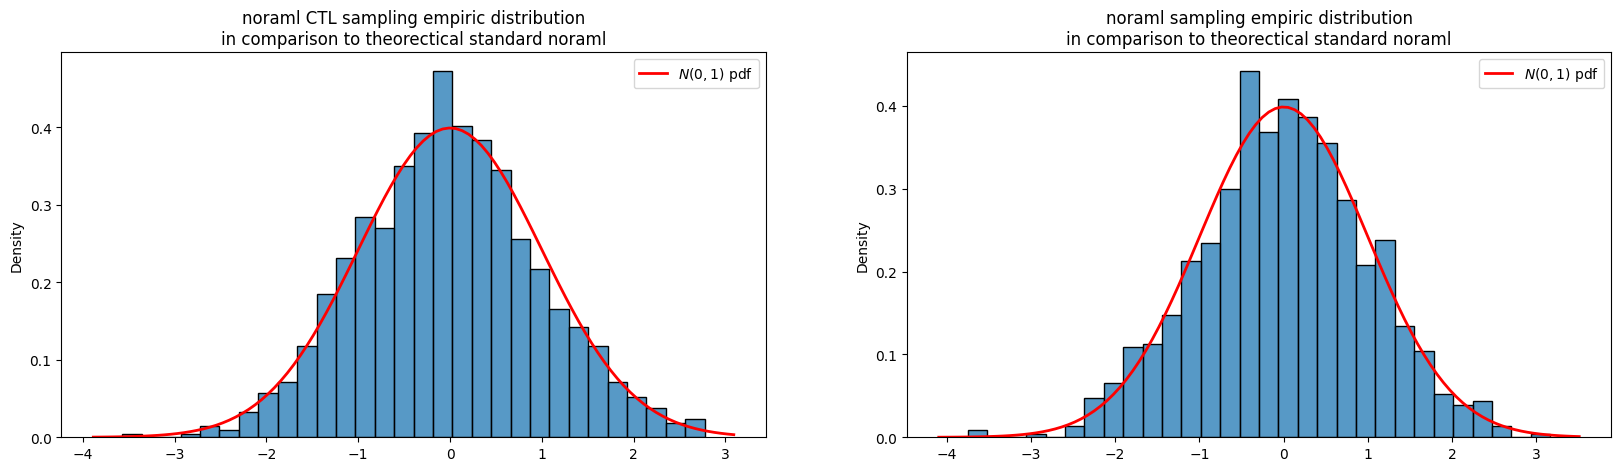

In [458]:
import math

N_SAMPLES = 1000
MY_ID = 201466349 # your personal ID number with leading zeros removed
random.seed(MY_ID)

_, ax = plt.subplots(1,2, figsize=(20,5))
i = 0
for sample_fn, params, name in [
    (sample_normal_clt, [4500], 'noraml CTL'),
    (sample_normal, [], 'noraml'),
#     (sample_t, [6], 't-distribution k=6')
]:
    samples = [sample_fn(*params) for _ in range(N_SAMPLES)]
    sns.histplot(samples, stat='density', bins=math.ceil(N_SAMPLES*0.03), ax=ax[i])

    x0, x1 = ax[i].get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = norm.pdf(x_pdf)
    ax[i].plot(x_pdf, y_pdf, 'r', lw=2, label='$N(0,1)$ pdf')
    ax[i].legend()
    ax[i].set(title=f'{name} sampling empiric distribution\nin comparison to theorectical standard noraml')
    i += 1

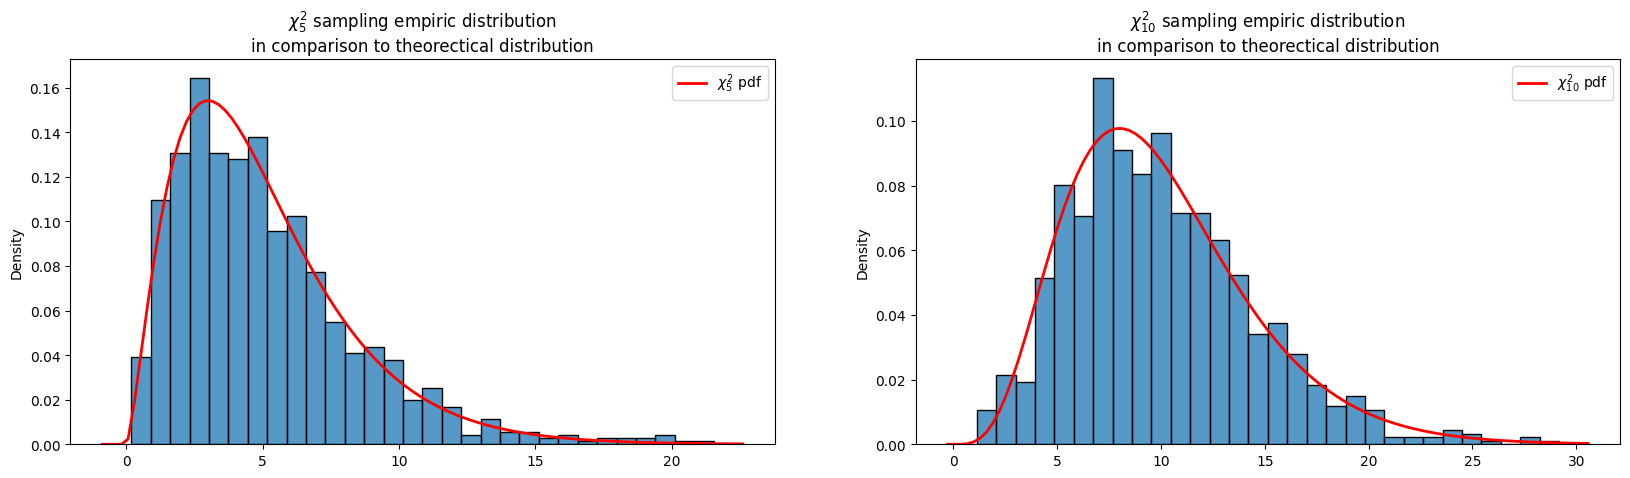

In [468]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
i = 0
for k in (5, 10):
    samples = [sample_chisq(k) for _ in range(N_SAMPLES)]
    sns.histplot(samples, stat='density', bins=math.ceil(N_SAMPLES*0.03), ax=ax[i])

    x0, x1 = ax[i].get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = chi2.pdf(x_pdf, k)
    stat_name = f'$\chi^2_{"{"+str(k)+"}"}$'
    ax[i].plot(x_pdf, y_pdf, 'r', lw=2, label=f'{stat_name} pdf')
    ax[i].legend()
    ax[i].set(title=f'{stat_name} sampling empiric distribution\nin comparison to theorectical distribution')
    i += 1

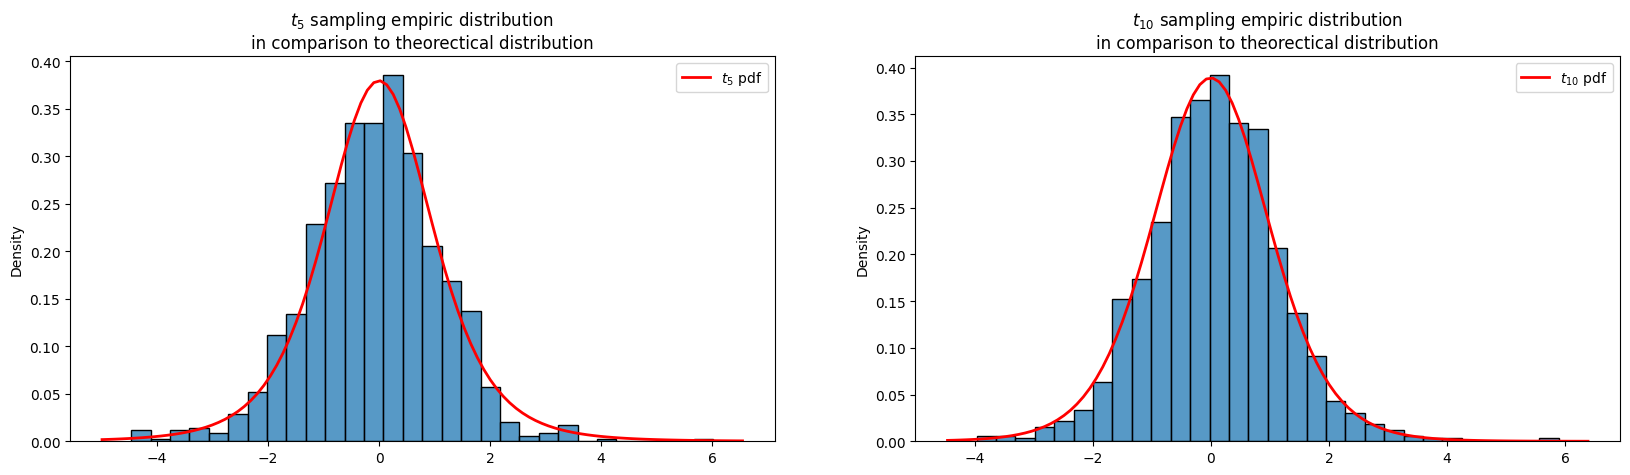

In [469]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
i = 0
for k in (5, 10):
    samples = [sample_t(k) for _ in range(N_SAMPLES)]
    sns.histplot(samples, stat='density', bins=math.ceil(N_SAMPLES*0.03), ax=ax[i])

    x0, x1 = ax[i].get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = t.pdf(x_pdf, k)
    stat_name = f'$t_{"{"+str(k)+"}"}$'
    ax[i].plot(x_pdf, y_pdf, 'r', lw=2, label=f'{stat_name} pdf')
    ax[i].legend()
    ax[i].set(title=f'{stat_name} sampling empiric distribution\nin comparison to theorectical distribution')
    i += 1

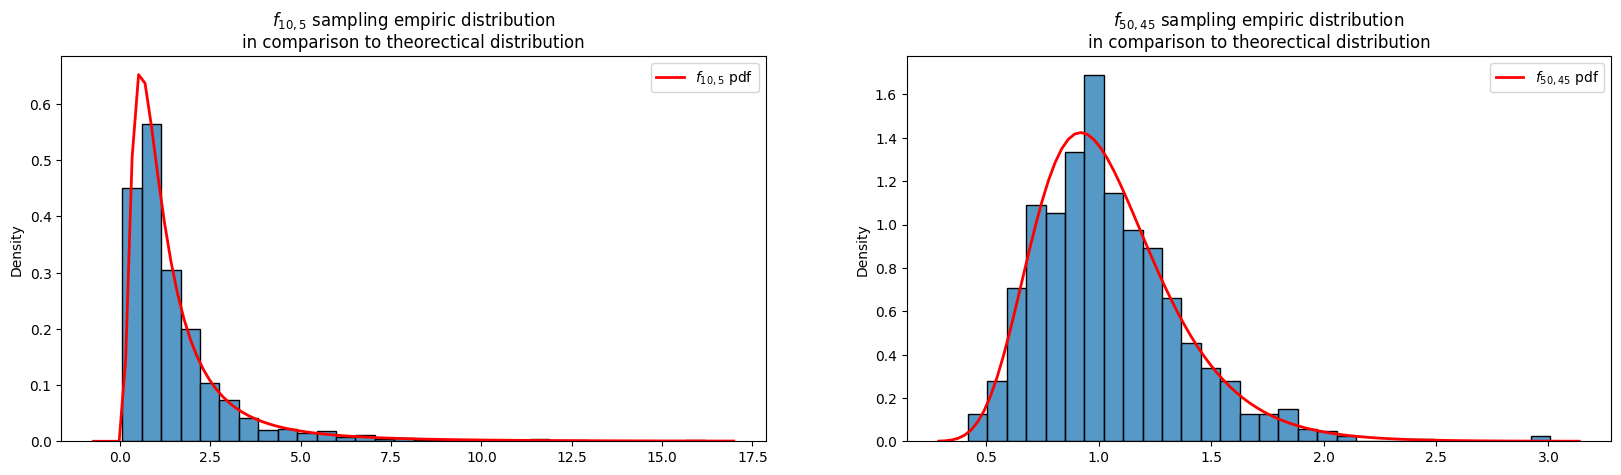

In [473]:
_, ax = plt.subplots(1, 2, figsize=(20,5))
i = 0
for k1, k2 in ((10,5), (50,45)):
    samples = [sample_f(k1, k2) for _ in range(N_SAMPLES)]
    sns.histplot(samples, stat='density', bins=math.ceil(N_SAMPLES*0.03), ax=ax[i])

    x0, x1 = ax[i].get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    y_pdf = f.pdf(x_pdf, k1, k2)
    stat_name = f'$f_{"{"+ f"{k1},{k2}" +"}"}$'
    ax[i].plot(x_pdf, y_pdf, 'r', lw=2, label=f'{stat_name} pdf')
    ax[i].legend()
    ax[i].set(title=f'{stat_name} sampling empiric distribution\nin comparison to theorectical distribution')
    i += 1